# 경사 하강법 (Gradient Descent)

**경사 하강법(Gradient Descent)**은 함수의 값을 최소화하는 지점을 찾기 위한 대표적인 최적화(optimization) 알고리즘임. 머신러닝에서는 모델의 예측과 실제값 사이의 오차를 정의하는 **비용 함수(Cost Function)**를 최소화하는 모델 파라미터(가중치와 편향)를 찾기 위해 사용됨.

가장 가파른 경사를 따라 산을 내려가는 모습을 상상하면 이해하기 쉬움. 현재 위치에서 경사가 가장 가파른 방향(gradient의 반대 방향)으로 한 걸음씩 이동하며 점진적으로 산의 가장 낮은 지점(비용 함수의 최솟값)을 찾아감.

### 📐 수학적 배경

경사 하강법의 핵심은 파라미터 업데이트 규칙임. 비용 함수 $J(\theta)$를 최소화하기 위해 파라미터 $\theta$를 다음과 같이 업데이트함.

$$ \theta_{\text{new}} := \theta_{\text{old}} - \eta \nabla J(\theta) $$

* $\theta$: 업데이트할 모델 파라미터 (예: 가중치 $W$, 편향 $b$)
* $\eta$ (에타): **학습률(Learning Rate)**. 경사를 따라 얼마나 큰 보폭으로 이동할지 결정하는 하이퍼파라미터.
* $\nabla J(\theta)$: 비용 함수 $J$에 대한 $\theta$의 **그래디언트(gradient)**. 그래디언트는 함수 값이 가장 가파르게 증가하는 방향을 나타내므로, 그 반대 방향으로 이동해야 값이 감소함.

#### 예시: 선형 회귀의 그래디언트
선형 회귀의 비용 함수 MSE $J(W, b) = \frac{1}{n} \sum_{i=1}^{n}((Wx_i + b) - y_i)^2$ 에 대해, 각 파라미터 $W$와 $b$의 그래디언트(편미분)는 다음과 같음.

$$ \frac{\partial J}{\partial W} = \frac{2}{n} \sum_{i=1}^{n} x_i((Wx_i + b) - y_i) $$
$$ \frac{\partial J}{\partial b} = \frac{2}{n} \sum_{i=1}^{n} ((Wx_i + b) - y_i) $$

### 셋업 (Setup)
계산 및 시각화를 위한 라이브러리 임포트.

In [1]:
# !pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt

### 예제 데이터 준비 (Data Preparation)
간단한 선형 관계를 가지는 데이터를 생성함. 목표는 경사 하강법을 통해 $y \approx 2X + 1$ 관계를 찾아내는 것.

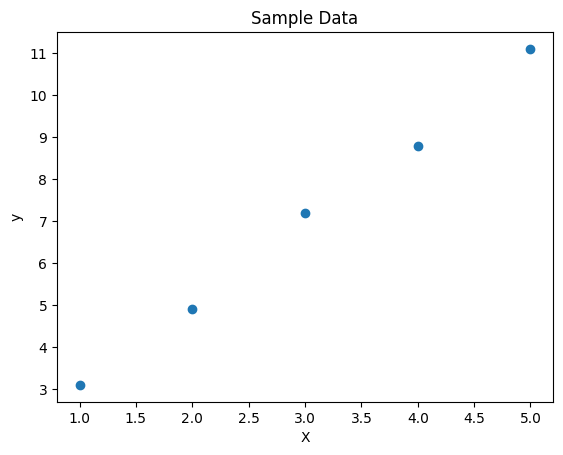

In [2]:
# 데이터 생성
X = np.array([1, 2, 3, 4, 5])
y = np.array([3.1, 4.9, 7.2, 8.8, 11.1]) # y = 2X + 1 근처의 값

# 데이터 시각화
plt.scatter(X, y)
plt.title("Sample Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### 핵심 로직 구현 (Code Implementation)
경사 하강법 알고리즘을 단계별로 구현하여 선형 회귀 모델의 가중치(W)와 편향(b)을 학습시킴.

In [3]:
# 1. 파라미터 초기화
W = 0.0  # 가중치
b = 0.0  # 편향

# 2. 하이퍼파라미터 설정
learning_rate = 0.01
epochs = 1000  # 학습 반복 횟수
n = len(X)

cost_history = [] # 비용 기록을 위한 리스트

# 3. 경사 하강법 학습 시작
for i in range(epochs):
    # 3-1. 예측값 계산
    y_pred = W * X + b
    
    # 3-2. 비용(MSE) 계산
    cost = np.mean((y_pred - y)**2)
    cost_history.append(cost)
    
    # 3-3. 그래디언트 계산
    grad_W = (2/n) * np.sum(X * (y_pred - y))
    grad_b = (2/n) * np.sum(y_pred - y)
    
    # 3-4. 파라미터 업데이트
    W = W - learning_rate * grad_W
    b = b - learning_rate * grad_b
    
    # 학습 과정 출력 (100번마다)
    if (i+1) % 100 == 0:
        print(f"Epoch {i+1:4d} | Cost: {cost:.4f} | W: {W:.4f} | b: {b:.4f}")

Epoch  100 | Cost: 0.0414 | W: 2.0815 | b: 0.7198
Epoch  200 | Cost: 0.0315 | W: 2.0552 | b: 0.8147
Epoch  300 | Cost: 0.0266 | W: 2.0365 | b: 0.8823
Epoch  400 | Cost: 0.0240 | W: 2.0231 | b: 0.9305
Epoch  500 | Cost: 0.0227 | W: 2.0136 | b: 0.9648
Epoch  600 | Cost: 0.0221 | W: 2.0068 | b: 0.9893
Epoch  700 | Cost: 0.0217 | W: 2.0020 | b: 1.0067
Epoch  800 | Cost: 0.0216 | W: 1.9985 | b: 1.0192
Epoch  900 | Cost: 0.0215 | W: 1.9961 | b: 1.0280
Epoch 1000 | Cost: 0.0214 | W: 1.9943 | b: 1.0343


### 📊 결과 확인 및 시각화 (Results & Visualization)

In [4]:
# 최종 학습된 파라미터 출력
print(f"\n최종 학습 결과 -> W: {W:.4f}, b: {b:.4f}")


최종 학습 결과 -> W: 1.9943, b: 1.0343


#### 비용 함수 변화 시각화
학습이 진행됨에 따라 비용(오차)이 어떻게 감소하는지 확인.

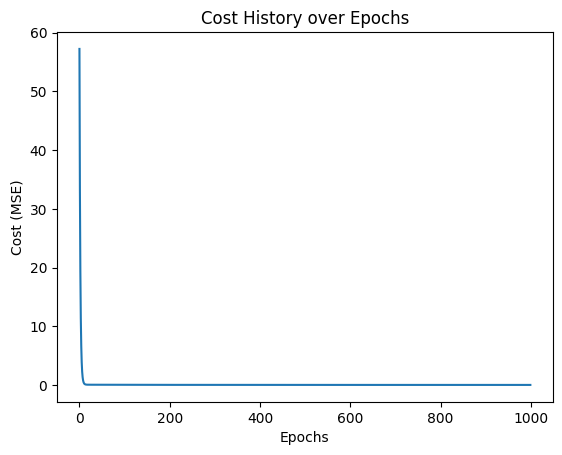

In [5]:
plt.plot(cost_history)
plt.title("Cost History over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.show()

#### 회귀선 시각화
학습된 W와 b를 사용하여 데이터에 가장 적합한 회귀선을 시각화.

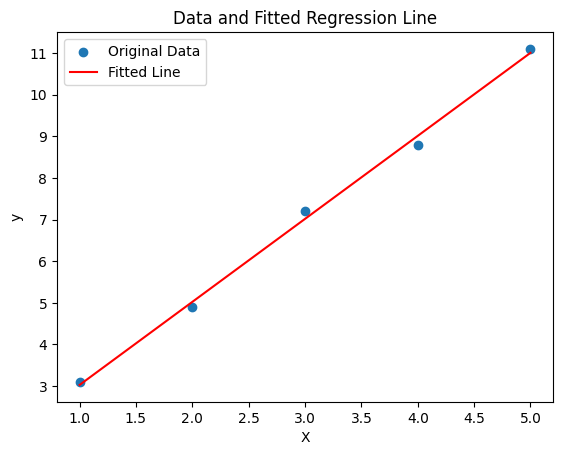

In [6]:
plt.scatter(X, y, label='Original Data')
plt.plot(X, W * X + b, color='red', label='Fitted Line')
plt.title("Data and Fitted Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### 고려사항 (Considerations)

* **학습률(Learning Rate)의 중요성**: 학습률은 경사 하강법의 성능에 매우 큰 영향을 줌.
  * **학습률이 너무 작으면**: 학습 속도가 매우 느려져 최적점에 도달하는 데 오랜 시간이 걸림.
  * **학습률이 너무 크면**: 최적점을 지나쳐 버리거나 값이 발산(diverge)하여 학습이 제대로 이루어지지 않을 수 있음. 적절한 학습률을 찾는 것이 중요함.

* **경사 하강법의 종류**: 본 예제에서는 전체 데이터를 사용하여 그래디언트를 계산하는 **배치(Batch) 경사 하강법**을 사용함. 데이터가 매우 클 경우, 일부 데이터만 사용하는 **확률적 경사 하강법(Stochastic Gradient Descent, SGD)**이나 **미니배치 경사 하강법(Mini-batch Gradient Descent)**이 더 효율적일 수 있음.

* **지역 최솟값(Local Minimum)**: 비용 함수가 복잡한 비볼록(non-convex) 함수인 경우, 경사 하강법은 전역 최솟값(global minimum)이 아닌 지역 최솟값에 수렴할 수 있음.

### 최종 요약 (Conclusion)

경사 하강법은 비용 함수의 그래디언트를 계산하여 비용이 감소하는 방향으로 모델의 파라미터를 점진적으로 업데이트하는 강력한 최적화 알고리즘임.

이 노트북에서는 경사 하강법의 원리를 이해하고, 이를 직접 구현하여 간단한 선형 회귀 문제를 해결해봄. 비용이 점차 감소하고, 최종적으로 데이터의 패턴을 잘 설명하는 회귀선을 찾아내는 과정을 통해 경사 하강법의 동작 방식을 직관적으로 확인함.